# 1) Coleta de Dados IPEA DATA

Os dados do PIB real foram coletados de duas formas, uma via download direto do arquivo excel e outra de uma API que traz os dados mais atualiados.


=> http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=38414

## 1.1) Dados Planilha PIB, Consumo, Saldo BC e Serviçõs/PIB e EMBI+

In [1]:
# A planilha está na pasta dados.

import os
import pandas as pd
import math
from tabulate import tabulate
diretorio = os.path.dirname(os.getcwd())
local_arquivo = os.path.join(diretorio,
                             'dados',
                             'Dados.xls')

#abrindo o arquivo em dataframe no pandas
dataframe = pd.read_excel(local_arquivo)

#As datas dos arquivo ipeadata não são reconhecidos como data pelo python.
#Abaixo crio uma serie de datas trimestrais e a incluo como indice (index) do dataframe pib_pm_deflacionado_ipca
dataframe.index = pd.date_range('1996-03',
                      periods=len(dataframe['PIB  precos de mercado IPCA']),
                      freq='Q')

# Log Das Variaveis
dataframe['PIB  precos de mercado IPCA Sem Log'] = [pib for pib in dataframe['PIB  precos de mercado IPCA'].values]
dataframe['PIB  precos de mercado IPCA'] = [math.log(pib) for pib in dataframe['PIB  precos de mercado IPCA'].values]
dataframe['PIB  consumo final  familias  IPCA Sem Log'] = [pib for pib in dataframe['PIB  consumo final  familias  IPCA'].values]
dataframe['PIB  consumo final  familias  IPCA'] = [math.log(pib) for pib in dataframe['PIB  consumo final  familias  IPCA'].values]



#selecionando a coluna PIB a preços de marcado deflacionado pelo IPCA
pib_pm_deflacionado_ipca_sem_log = dataframe['PIB  precos de mercado IPCA Sem Log']
pib_pm_deflacionado_ipca = dataframe['PIB  precos de mercado IPCA']

#selecionando a coluna consumo a preços de marcado deflacionado pelo IPCA
consumo_deflacionado_ipca_sem_log = dataframe['PIB  consumo final  familias  IPCA Sem Log']
consumo_deflacionado_ipca = dataframe['PIB  consumo final  familias  IPCA']

#selecionando a coluna exportação a preços de marcado deflacionado pelo IPCA
exportação_deflacionado_ipca = dataframe['PIB – exportações precos de mercado IPCA']
importação_deflacionado_ipca = dataframe['PIB – importações precos de mercado IPCA']

#selecionando a coluna importação a preços de marcado deflacionado pelo IPCA
dataframe['EMBI Média'] = [(pontosbase/10000) for pontosbase in dataframe['EMBI Média']]
dataframe['EMBI Fim de Período'] = [pontosbase/10000 for pontosbase in dataframe['EMBI Fim de Período']]


#selecionando a coluna importação a preços de marcado deflacionado pelo IPCA
embi_media = dataframe['EMBI Média']
embi_fim_periodo = dataframe['EMBI Fim de Período']

#correlation_dataframe = pd.concat([correlation_dataframe, dataframe['PIB  precos de mercado IPCA Sem Log']], axis=1, sort=False)
#correlation_dataframe = pd.concat([correlation_dataframe, embi_fim_periodo], axis=1, sort=False)


## 1.2) Dados Planilha Juros Americanos

In [2]:
# A planilha de juros está na pasta dados.

local_arquivo_juros = os.path.join(diretorio,
                             'dados',
                             'Taxa de Juros Americanos Trimestre.xls')

#abrindo o arquivo em dataframe no pandas
dataframe = pd.read_excel(local_arquivo_juros)

#As datas dos arquivo ipeadata não são reconhecidos como data pelo python.
#Abaixo crio uma serie de datas trimestrais e a incluo como indice (index) do dataframe juro_americanos
dataframe.index = pd.date_range('1962-10',
                      periods=len(dataframe['DGS10 media']),
                      freq='Q')


dataframe['DGS10 media trimetral'] = [(((taxa/100)+1)**(1/4) - 1)*100 for taxa in dataframe['DGS10 media'].values]
dataframe['DGS10 fim periodo trimestral'] = [(((taxa/100)+1)**(1/4) - 1)*100 for taxa in dataframe['DGS10 fim periodo'].values]

#selecionando a coluna PIB a preços de marcado deflacionado pelo IPCA
taxa_juros_americanos_media = dataframe['DGS10 media']
taxa_juros_americanos_fim_periodo = dataframe['DGS10 fim periodo']

dataframe_juros_americanos = dataframe

# 2) Dessazonalizar Séries PIB, Consumo, Exportação e Importação

Abaixo coloquei a documentação do ajuste de sazonalidade x13
https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_analysis.html

In [5]:
# Pacote statsmodels que possui o x13
import statsmodels.tsa as sm

#precisei baixar um arquivo do site census pra poder a ajuste ser feito
#abaixo esta o site e o stackoverflow tirando duvidas sobre como fazer funcionar o ajuste no pyhton
#https://www.census.gov/srd/www/x13as/
#https://stackoverflow.com/questions/32053770/arima-seasonal-prediction-with-python-x12a-and-x13as-not-found-on-path

#coloquei o aquivo no numa pasta chamada x13 dentro do diretorio do notebook
local_x13_seassonal_file = os.path.join(diretorio,
                                        'notebook',
                                        'x13',
                                        'x13as')

#execução do ajuste no pib consumo importação e exportação
pib_pm_deflacionado_ipca_dessazonalizado_sem_log = sm.x13.x13_arima_analysis(pib_pm_deflacionado_ipca_sem_log,x12path=local_x13_seassonal_file)
pib_pm_deflacionado_ipca_dessazonalizado = sm.x13.x13_arima_analysis(pib_pm_deflacionado_ipca,x12path=local_x13_seassonal_file)
consumo_deflacionado_ipca_dessazonalizado_sem_log = sm.x13.x13_arima_analysis(consumo_deflacionado_ipca_sem_log,x12path=local_x13_seassonal_file)
consumo_deflacionado_ipca_dessazonalizado = sm.x13.x13_arima_analysis(consumo_deflacionado_ipca,x12path=local_x13_seassonal_file)
exportacao_deflacionado_ipca_dessazonalizado = sm.x13.x13_arima_analysis(exportação_deflacionado_ipca,x12path=local_x13_seassonal_file)
importacao_deflacionado_ipca_dessazonalizado = sm.x13.x13_arima_analysis(importação_deflacionado_ipca,x12path=local_x13_seassonal_file)


dataframe_pib_pm_deflacionado_ipca_dessazonalizado_sem_log = pd.DataFrame(pib_pm_deflacionado_ipca_dessazonalizado_sem_log.seasadj)
dataframe_pib_pm_deflacionado_ipca_dessazonalizado_sem_log = dataframe_pib_pm_deflacionado_ipca_dessazonalizado_sem_log.rename(columns={'seasadj':'PIB Real Dessazonalizado Sem Log'})

dataframe_pib_pm_deflacionado_ipca_dessazonalizado = pd.DataFrame(pib_pm_deflacionado_ipca_dessazonalizado.seasadj)
dataframe_pib_pm_deflacionado_ipca_dessazonalizado = dataframe_pib_pm_deflacionado_ipca_dessazonalizado.rename(columns={'seasadj':'PIB Real Dessazonalizado'})

dataframe_consumo_deflacionado_ipca_dessazonalizado_sem_log = pd.DataFrame(consumo_deflacionado_ipca_dessazonalizado_sem_log.seasadj)
dataframe_consumo_deflacionado_ipca_dessazonalizado_sem_log = dataframe_consumo_deflacionado_ipca_dessazonalizado_sem_log.rename(columns={'seasadj':'Consumo Real Dessazonalizado Sem Log'})

dataframe_consumo_deflacionado_ipca_dessazonalizado = pd.DataFrame(consumo_deflacionado_ipca_dessazonalizado.seasadj)
dataframe_consumo_deflacionado_ipca_dessazonalizado = dataframe_consumo_deflacionado_ipca_dessazonalizado.rename(columns={'seasadj':'Consumo Real Dessazonalizado'})

dataframe_exportacao_deflacionado_ipca_dessazonalizado = pd.DataFrame(exportacao_deflacionado_ipca_dessazonalizado.seasadj)
dataframe_exportacao_deflacionado_ipca_dessazonalizado = dataframe_exportacao_deflacionado_ipca_dessazonalizado.rename(columns={'seasadj':'Exportacao Real Dessazonalizado'})

dataframe_importacao_deflacionado_ipca_dessazonalizado = pd.DataFrame(importacao_deflacionado_ipca_dessazonalizado.seasadj)
dataframe_importacao_deflacionado_ipca_dessazonalizado = dataframe_importacao_deflacionado_ipca_dessazonalizado.rename(columns={'seasadj':'Importacao Real Dessazonalizado'})

#Descomente para printar o ajuste
#pib_pm_deflacionado_ipca_dessazonalizado.seasadj



# Exportando os Dados de log do PIB e CONSUMO dessazonalizado para Excel
Tabela_Dessazonalizada = pd.concat([dataframe_pib_pm_deflacionado_ipca_dessazonalizado,
                                    dataframe_consumo_deflacionado_ipca_dessazonalizado], axis=1, sort=False)

## 2.1) Montanto Tabela das Correlações

In [6]:
correlation_dataframe = pd.concat([                        
           embi_fim_periodo,
           dataframe_pib_pm_deflacionado_ipca_dessazonalizado_sem_log,
           dataframe_exportacao_deflacionado_ipca_dessazonalizado,
           dataframe_importacao_deflacionado_ipca_dessazonalizado], axis=1, sort=False)


## 2.1.1) Criando a Serie Saldo BC/PIB com as variaveis dessazonalizadas

In [7]:
correlation_dataframe['Saldo BC/PIB %'] = (correlation_dataframe['Exportacao Real Dessazonalizado'] - correlation_dataframe['Importacao Real Dessazonalizado'])/correlation_dataframe['PIB Real Dessazonalizado Sem Log']

In [8]:
correlation_dataframe = correlation_dataframe.drop(columns=['Exportacao Real Dessazonalizado'])
correlation_dataframe = correlation_dataframe.drop(columns=['Importacao Real Dessazonalizado'])
correlation_dataframe = correlation_dataframe.drop(columns=['PIB Real Dessazonalizado Sem Log'])

## 2.1) Plot das Series

In [9]:
#pacotes de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages
fmt = '{x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)


#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot da Serie original
ax.plot(pib_pm_deflacionado_ipca.index,
        pib_pm_deflacionado_ipca.values,'o',label='PIBpm')

# Plot da Serie Com Ajuste Sazonal
ax.yaxis.set_major_formatter(tick) 
ax.plot(pib_pm_deflacionado_ipca_dessazonalizado.seasadj.index,
        pib_pm_deflacionado_ipca_dessazonalizado.seasadj.values,label='PIBpm Dessazonalizado')

# Plot da Serie original Consumo
ax.plot(consumo_deflacionado_ipca.index,
        consumo_deflacionado_ipca.values,'o',label='Consumo')

# Plot da Serie Com Ajuste Sazonal Consump
ax.yaxis.set_major_formatter(tick) 
ax.plot(consumo_deflacionado_ipca_dessazonalizado.seasadj.index,
        consumo_deflacionado_ipca_dessazonalizado.seasadj.values,label='Consumo Dessazonalizado')



# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legendas
ax.legend(loc="upper left",fontsize=25)


/home/frederico/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


## Plot Balança Comercial/PIB

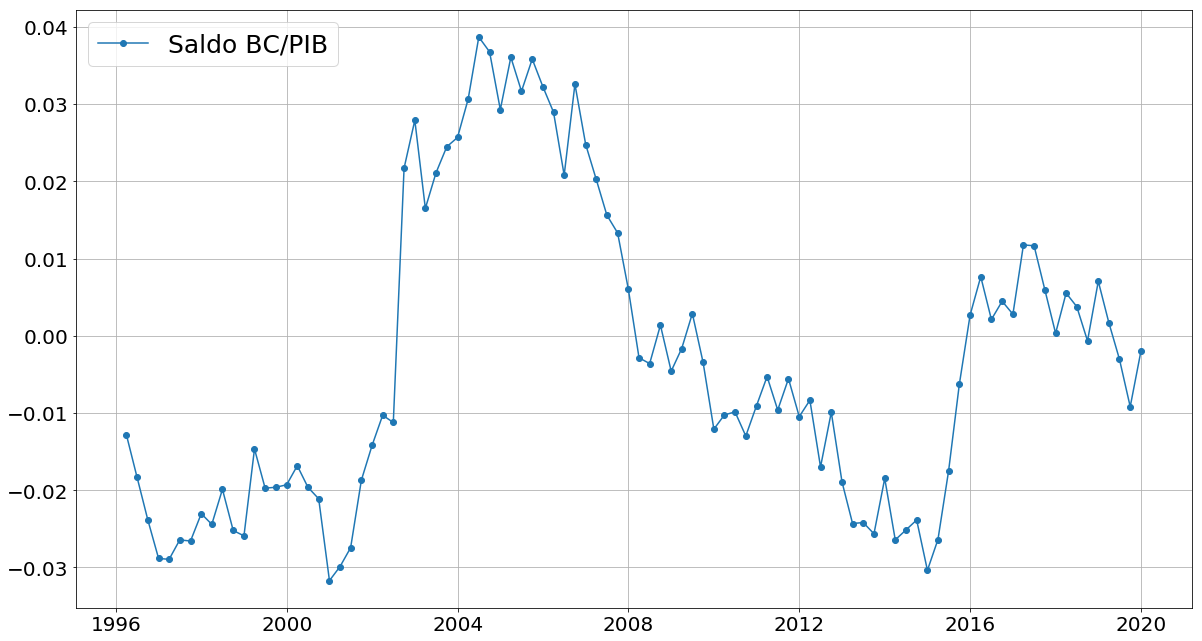

In [10]:
#pacotes de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages
fmt = '{x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)


#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot da Serie original
ax.plot(correlation_dataframe['Saldo BC/PIB %'].index,
        correlation_dataframe['Saldo BC/PIB %'].values,'-o',label='Saldo BC/PIB')


# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",fontsize=25)

# 3) Aplicando Filtros  

## 3.1) Band Pass - Baxter and King
https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_filters.html

No call que fizemos eu nao me lembrava onde tinha visto sobre esse filtro. 
https://www.researchgate.net/publication/24111493_Measuring_Business_Cycles_The_Real_Business_Cycle_Approach_and_Related_Controversies

Quando comecei o a rodar os modelos em 2016 eu ja conhecia esse filtro, mas se não me engano na época eu perdia parte inicial e final da amostra. Mas tinha compreendido errado o que é calibração. Se entendi bem a ideia desses tipos de modelos DSGE é replicar o primeiro e o segundo momento o mais proximo da realidade da amostra.


Site com explicações do pacote
https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.bk_filter.bkfilter.html

In [11]:
# Pacode de Display de tabela em HTML
from IPython.core.display import display, HTML
#Pacote com o filtro Baxter King => sm.filters.bk_filter.bkfilter()
# pib_pm_deflacionado_ipca_dessazonalizado.seasadj é o resultado do ajuste x13
# seasadj chama os objeto com as datas e os valores
# low = O período mínimo para oscilações. Baxter e King sugerem que o ciclo de negócios calculados por Burns-Mitchell nos EUA tenha 6 para dados trimestrais e 1,5 para dados anuais.
# high = Período máximo para oscilações BK sugere que o ciclo de negócios nos EUA tenha 32 para dados trimestrais e 8 para dados anuais.
pib_pm_deflacionado_ipca_dessazonalizado_filtrado_bk = sm.filters.bk_filter.bkfilter(pib_pm_deflacionado_ipca_dessazonalizado.seasadj,
                                                                                     low=6,
                                                                                     high=32,
                                                                                     K=12)
consumo_deflacionado_ipca_dessazonalizado_filtrado_bk = sm.filters.bk_filter.bkfilter(consumo_deflacionado_ipca_dessazonalizado.seasadj,
                                                                                     low=6,
                                                                                     high=32,
                                                                                     K=12)



# o retorno é um vetor [array] com os componetes ciclicos serie x. Descomente a linhade baixo para printar
df_pib_filtrado = pd.DataFrame(pib_pm_deflacionado_ipca_dessazonalizado_filtrado_bk)
# Dando nome a coluna de datas
df_pib_filtrado.index.name = "Data"
# transformando a tabela em HTML 
pib_filtrado_tabela_HTML = tabulate(df_pib_filtrado, tablefmt="html")
# descomente para printar a tabela
#display(HTML(pib_filtrado_tabela_HTML))
#df_pib_filtrado


## 3.2) Christiano Fitzgerald asymmetric, random walk filter.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.cf_filter.cffilter.html#statsmodels.tsa.filters.cf_filter.cffilter

O filtro Christiano-Fitzgerald é uma generalização de BK e, portanto, também pode ser visto como média móvel ponderada.

os parametros low e high seguem as mesmas especificações do filtro BK

o parametro drift é a tendência dos dados. A tendência é estimada como np.arange (nobs) * (x [-1] - x [0]) / (len (x) -1).

In [12]:
# Com drift
pib_cf_filter_cycle_cf_drift, pib_cf_filter_trend_cf_drift = sm.filters.cf_filter.cffilter(dataframe_pib_pm_deflacionado_ipca_dessazonalizado['PIB Real Dessazonalizado'],
                                           low=6,
                                           high=32,
                                           drift=True)

# Sem drift
pib_cf_filter_cycle_cf_drift_s, pib_cf_filter_trend_cf_drift_s = sm.filters.cf_filter.cffilter(dataframe_pib_pm_deflacionado_ipca_dessazonalizado['PIB Real Dessazonalizado'],
                                           low=6,
                                           high=32,
                                           drift=False)


# Com drift
consumo_cf_filter_cycle_cf_drift, consumo_cf_filter_trend_cf_drift = sm.filters.cf_filter.cffilter(dataframe_consumo_deflacionado_ipca_dessazonalizado['Consumo Real Dessazonalizado'],
                                           low=6,
                                           high=32,
                                           drift=True)

# Sem drift
consumo_cf_filter_cycle_cf_drift_s, consumo_cf_filter_trend_cf_drift_s = sm.filters.cf_filter.cffilter(dataframe_consumo_deflacionado_ipca_dessazonalizado['Consumo Real Dessazonalizado'],
                                           low=6,
                                           high=32,
                                           drift=False)

## 3.3) HP simples

In [13]:
pib_hp_filter_cycle, pib_hp_filter_trend = sm.filters.hp_filter.hpfilter(dataframe_pib_pm_deflacionado_ipca_dessazonalizado['PIB Real Dessazonalizado'],
                                                                               1600)

consumo_hp_filter_cycle, consumo_hp_filter_trend = sm.filters.hp_filter.hpfilter(dataframe_consumo_deflacionado_ipca_dessazonalizado['Consumo Real Dessazonalizado'],
                                                                               1600)

## 3.4) Primeira Diferença (É assim?)

Vi que tem e especificação desse modelo no Arquivo do Pfeifer, mas nao li com detelhe e assumi que o filtro primeira diferença fosse somente a amostra atual menos a mostra defasada t-1.

In [14]:
pib_deflacionado_primeira_diferenca = dataframe_pib_pm_deflacionado_ipca_dessazonalizado['PIB Real Dessazonalizado'].diff()

consumo_deflacionado_primeira_diferenca = dataframe_consumo_deflacionado_ipca_dessazonalizado['Consumo Real Dessazonalizado'].diff()

# 3.5) Arquivo Filtrado enviado pelo Paulo

In [15]:
local_arquivo_filtrado = os.path.join(diretorio,
                             'dados',
                             'Tabela_Detrended.xls')

dataframe_pib_consumo_filtrados_matlab = pd.read_excel(local_arquivo_filtrado,
                                                       index_col=0)

dataframe_pib_consumo_filtrados_matlab.index.name = 'Data'

# 4) Plot dos Componentes Ciclicos

## 4.1) PIB Real Dessazonalizado 1996:T1-2016:T4

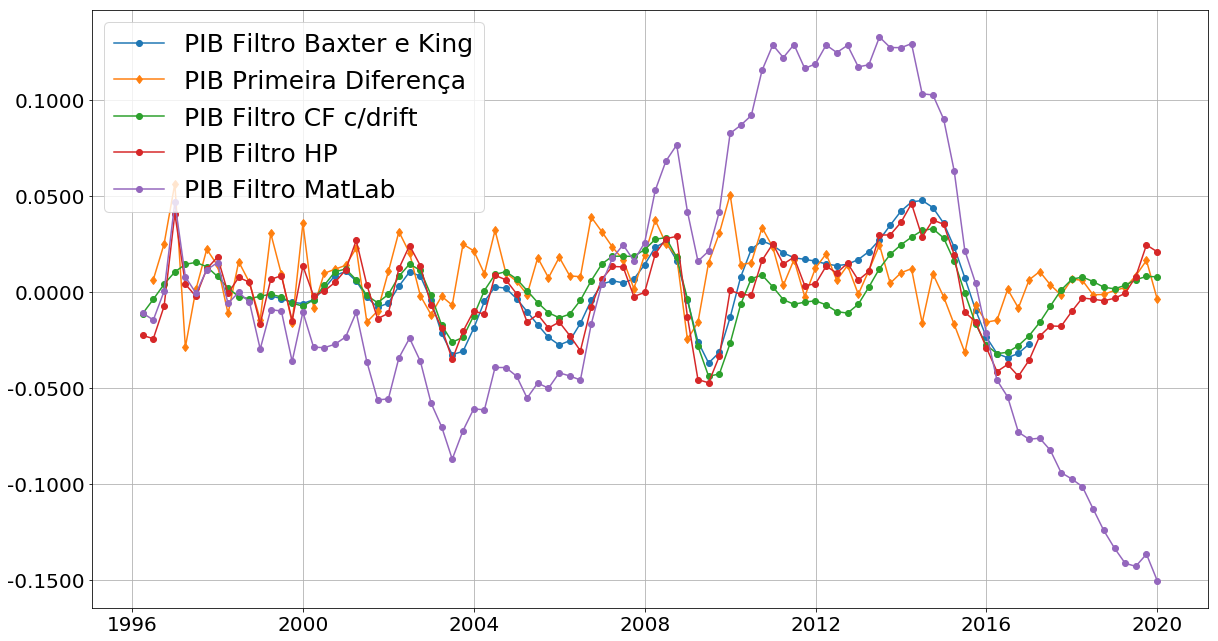

In [16]:
fmt = '{x:,.4f}'
tick = mtick.StrMethodFormatter(fmt)


#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro BK
ax.yaxis.set_major_formatter(tick) 
ax.plot(pib_pm_deflacionado_ipca_dessazonalizado_filtrado_bk.index,
        pib_pm_deflacionado_ipca_dessazonalizado_filtrado_bk.values,
        '-o',
        label='PIB Filtro Baxter e King')

# Plot da Primeira diferenaça da serie do pib dessazonalizado (isso é um filtro primeira diferença?)
ax.plot(pib_deflacionado_primeira_diferenca.index,
        pib_deflacionado_primeira_diferenca.values,
        '-d',
        label='PIB Primeira Diferença')

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro Christiano Fitzgerald asymmetric, random walk filter.
ax.plot(pib_cf_filter_cycle_cf_drift.index,
        pib_cf_filter_cycle_cf_drift.values,
        '-o',
        label='PIB Filtro CF c/drift')



# Plot do Compenente ciclico da série do pib real dessazonalizado filtro Christiano Fitzgerald sem drift
#ax.plot(pib_cf_filter_cycle_cf_drift_s.index,
#        pib_cf_filter_cycle_cf_drift_s.values,
#        '-o',
#        label='PIB Filtro CF s/drift')

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro HP.
ax.plot(pib_hp_filter_cycle.index,
        pib_hp_filter_cycle.values,
        '-o',
        label='PIB Filtro HP')

ax.plot(dataframe_pib_consumo_filtrados_matlab.index,
        dataframe_pib_consumo_filtrados_matlab['PIB_detrended'].values,
        '-o',
        label='PIB Filtro MatLab')

# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",
          fontsize=25)

## 4.1 Consumo Real Dessazonalizado 1996:T1-2016:T4

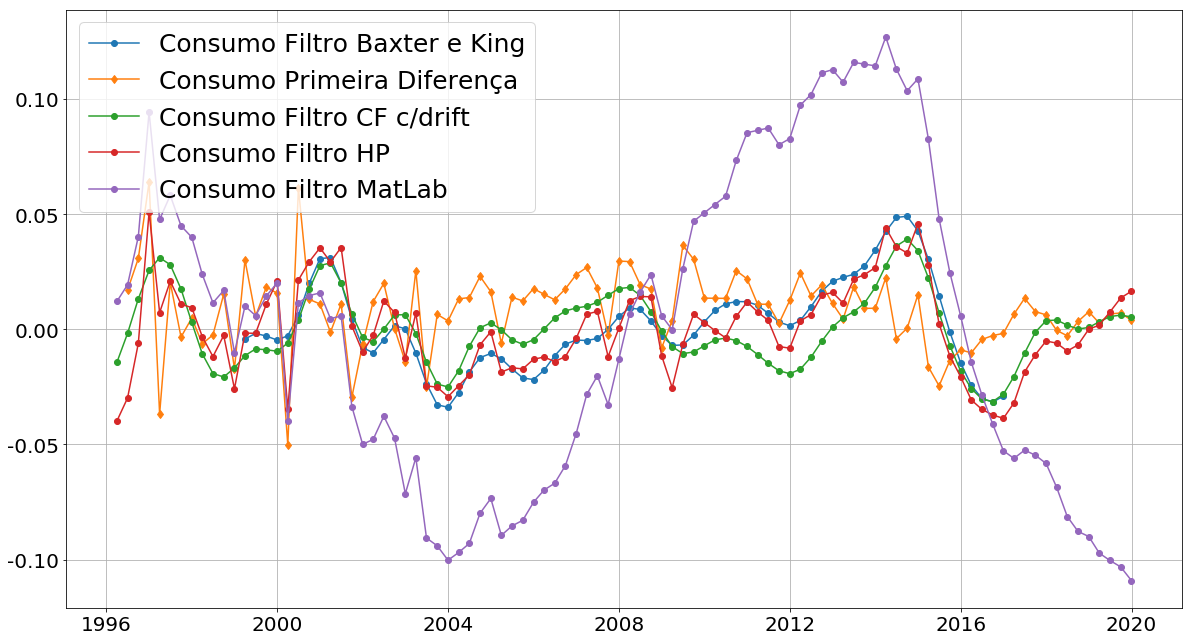

In [17]:
fmt = '{x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)


#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro BK
ax.yaxis.set_major_formatter(tick) 
ax.plot(consumo_deflacionado_ipca_dessazonalizado_filtrado_bk.index,
        consumo_deflacionado_ipca_dessazonalizado_filtrado_bk.values,
        '-o',
        label='Consumo Filtro Baxter e King')

# Plot da Primeira diferenaça da serie do pib dessazonalizado (isso é um filtro primeira diferença?)
ax.plot(consumo_deflacionado_primeira_diferenca.index,
        consumo_deflacionado_primeira_diferenca.values,
        '-d',
        label='Consumo Primeira Diferença')

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro Christiano Fitzgerald asymmetric, random walk filter.
ax.plot(consumo_cf_filter_cycle_cf_drift.index,
        consumo_cf_filter_cycle_cf_drift.values,
        '-o',
        label='Consumo Filtro CF c/drift')



# Plot do Compenente ciclico da série do pib real dessazonalizado filtro Christiano Fitzgerald sem drift
#ax.plot(pib_cf_filter_cycle_cf_drift_s.index,
#        pib_cf_filter_cycle_cf_drift_s.values,
#        '-o',
#        label='PIB Filtro CF s/drift')

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro HP.
ax.plot(consumo_hp_filter_cycle.index,
        consumo_hp_filter_cycle.values,
        '-o',
        label='Consumo Filtro HP')

ax.plot(dataframe_pib_consumo_filtrados_matlab.index,
        dataframe_pib_consumo_filtrados_matlab['Consumo_detrended'].values,
        '-o',
        label='Consumo Filtro MatLab')




# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",
          fontsize=25)

# Plot EMBI+ Trimestral, Média e Fim do Periodo

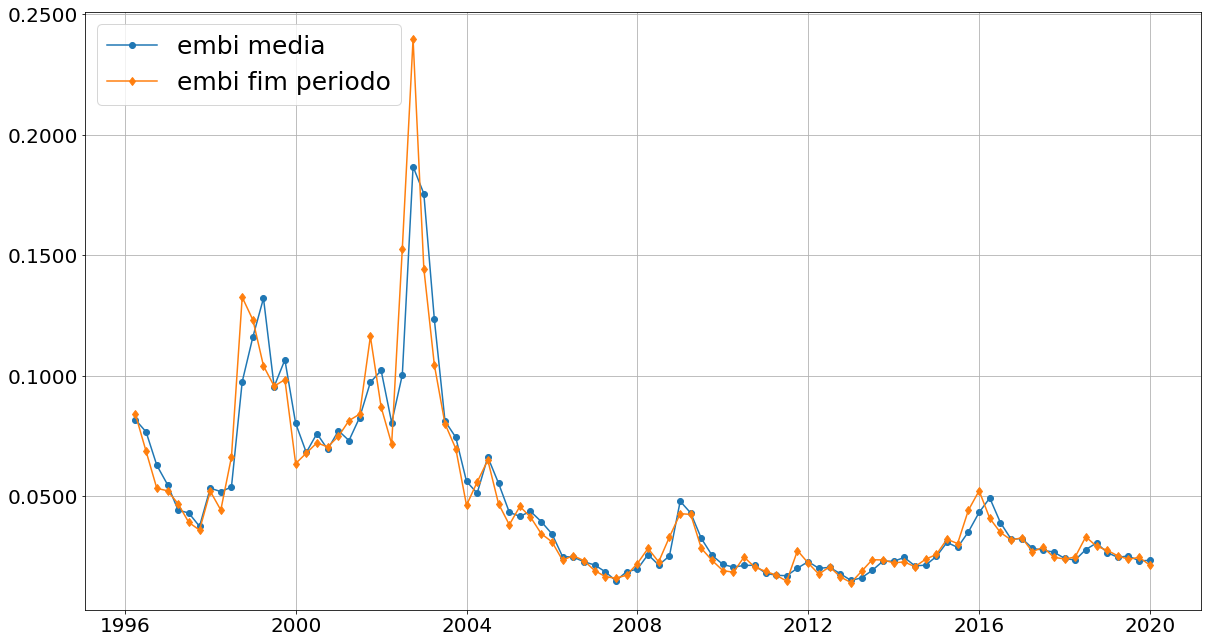

In [18]:
fmt = '{x:,.4f}'
tick = mtick.StrMethodFormatter(fmt)


#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro BK
ax.yaxis.set_major_formatter(tick) 
ax.plot(embi_media.index,
        embi_media.values,
        '-o',
        label='embi media')

# Plot da Primeira diferenaça da serie do pib dessazonalizado (isso é um filtro primeira diferença?)
ax.plot(embi_fim_periodo.index,
        embi_fim_periodo.values,
        '-d',
        label='embi fim periodo')



# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",
          fontsize=25)

# Plot Juros Americanos 10 Anos Trimestral, Média e Fim do Periodo

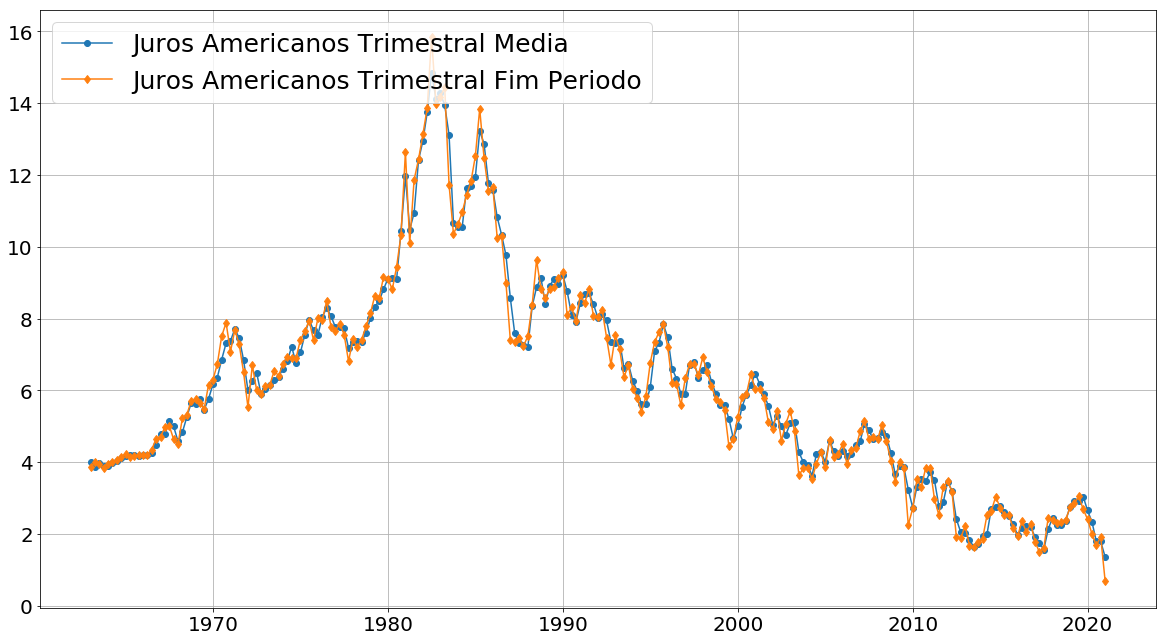

In [19]:
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)


#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro BK
ax.yaxis.set_major_formatter(tick) 
ax.plot(taxa_juros_americanos_media.index,
        taxa_juros_americanos_media.values,
        '-o',
        label='Juros Americanos Trimestral Media')

# Plot da Primeira diferenaça da serie do pib dessazonalizado (isso é um filtro primeira diferença?)
ax.plot(taxa_juros_americanos_fim_periodo.index,
        taxa_juros_americanos_fim_periodo.values,
        '-d',
        label='Juros Americanos Trimestral Fim Periodo')



# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",
          fontsize=25)

# Media da Taxa dos Juros Americanos

In [20]:
taxa_media_juros_americano = dataframe_juros_americanos['DGS10 fim periodo trimestral'].mean()/100

# Tabela de Correlações

In [21]:
correlation_dataframe = pd.concat([correlation_dataframe,
                                   dataframe_pib_consumo_filtrados_matlab], axis=1, sort=False)

In [22]:
correlation_dataframe.describe()

,EMBI Fim de Período,Saldo BC/PIB %,PIB_detrended,Consumo_detrended
count,96.000000,96.000000,9.600000e+01,9.600000e+01
mean,0.047058,-0.003488,-2.201711e-14,1.448870e-14
std,0.036817,0.019578,7.672852e-02,6.826785e-02
min,0.014200,-0.031708,-1.502723e-01,-1.091724e-01
25%,0.023475,-0.019618,-5.126961e-02,-5.662148e-02
50%,0.032500,-0.007310,-1.060169e-02,5.885949e-03
75%,0.063950,0.007208,5.536233e-02,4.872257e-02
max,0.239700,0.038690,1.325981e-01,1.269774e-01


In [23]:
correlation_dataframe.corr(method='pearson')

,EMBI Fim de Período,Saldo BC/PIB %,PIB_detrended,Consumo_detrended
EMBI Fim de Período,1.000000,-0.040132,-0.293608,-0.229853
Saldo BC/PIB %,-0.040132,1.000000,-0.430528,-0.715521
PIB_detrended,-0.293608,-0.430528,1.000000,0.906366
Consumo_detrended,-0.229853,-0.715521,0.906366,1.000000


#  Valores Reais (Parametros para o erro quadratico Medio)

In [24]:
tabela_real = correlation_dataframe.corr(method='pearson')

In [25]:
corrRealSpreadBC = round(tabela_real['EMBI Fim de Período'][1],4)
corrRealSpreadPIB = round(tabela_real['EMBI Fim de Período'][2],4)
corrRealPibBC = round(tabela_real['Saldo BC/PIB %'][2],4)

### Desvio Padrão

In [26]:
correlation_dataframe.std()

EMBI Fim de Período    0.036817
Saldo BC/PIB %         0.019578
PIB_detrended          0.076729
Consumo_detrended      0.068268
dtype: float64

## 5) AR (1)

In [27]:
import statsmodels.tsa.ar_model as ar_model

diretorio = os.path.dirname(os.getcwd())
local_arquivo = os.path.join(diretorio,
                             'notebook',
                             'Dados_filtrados.xlsx')

#abrindo o arquivo em dataframe no pandas
dataframe_pib_consumo_filtrados_matlab = pd.read_excel(local_arquivo)




regressao  = ar_model.AR(dataframe_pib_consumo_filtrados_matlab['PIB_filtrado']).fit(maxlag=1,trend='nc')

print({'coef':regressao.params[0],
       'Std': regressao.bse[0]})

coef_regressao_ar1 = regressao.params[0]
std_regressao_ar1 = regressao.bse[0]

{'coef': 0.8737901483366254, 'Std': 0.051294009240897546}


/home/frederico/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Future

In [28]:
import statsmodels.tsa.statespace.sarimax as sarimax

regressao  = sarimax.SARIMAX(dataframe_pib_consumo_filtrados_matlab['PIB_filtrado'],order=(1,0,0),trend='n').fit()


In [29]:
regressao.params[0]

0.8737900764342168

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

## 5.1) Teste Raiz Unitária

A second set of facts about emerging markets relates to the behavior of the interest rates at which these economies borrow from the rest of the world and their current accounts.
Interest rates and the current account are strongly countercyclical and positively correlated to each other. That is, emerging markets tend to borrow more in good times and at lower interest rates as compared to slumps. These features contrast with those observed in developed small open economies. 

# Modelo Arellano

#  Calibração (variaveis  "ajustaveis" beta, gama, theta)

In [30]:
import sys
sys.path.append('..')

from python.arellano_model import Arellano_Economy
    
Economia_Arellano = Arellano_Economy(β = .9599,        # time discount rate
                                     γ = 2,          # risk aversion
                                     r = taxa_media_juros_americano,     # international interest rate
                                     ρ = coef_regressao_ar1 ,  # persistence in output
                                     η = std_regressao_ar1,   # st dev of output shock
                                     θ = 0.289,       # prob of regaining access
                                     ny = 21,         # number of points in y grid
                                     nB = 251,        # number of points in B grid
                                     tol = 1e-8,      # error tolerance in iteration
                                     maxit = 10000)

Running iteration 25 with dist of 0.39404819245864786
Running iteration 50 with dist of 0.13807341284138985
Running iteration 75 with dist of 0.049588962575512596
Running iteration 100 with dist of 0.017824685413181385
Running iteration 125 with dist of 0.0064072433871018575
Running iteration 150 with dist of 0.0023031435007254686
Running iteration 175 with dist of 0.0008278864784898587
Running iteration 200 with dist of 0.0002975915403773399
Running iteration 225 with dist of 0.00010697206345611221
Running iteration 250 with dist of 3.845210904884766e-05
Running iteration 275 with dist of 1.3821970362926095e-05
Running iteration 300 with dist of 4.9684365777125095e-06
Running iteration 325 with dist of 1.7859510244022658e-06
Running iteration 350 with dist of 6.419768148191451e-07
Running iteration 375 with dist of 2.3076458788295895e-07
Running iteration 400 with dist of 8.295049980233671e-08
Running iteration 425 with dist of 2.981734681384296e-08
Running iteration 450 with dist of 

## Preço Par

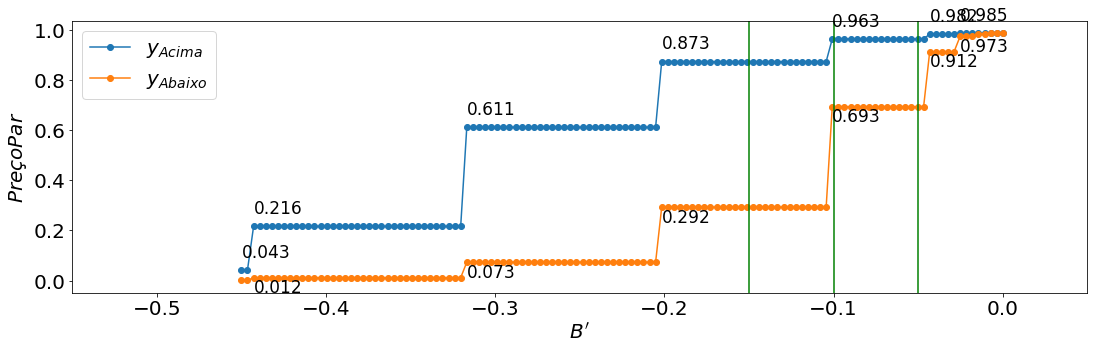

In [31]:
import importlib

import python.arellano_graficos

importlib.reload(python.arellano_graficos)


python.arellano_graficos.graficoPreco(Economia_Arellano,'PreçoPar')

## Juros

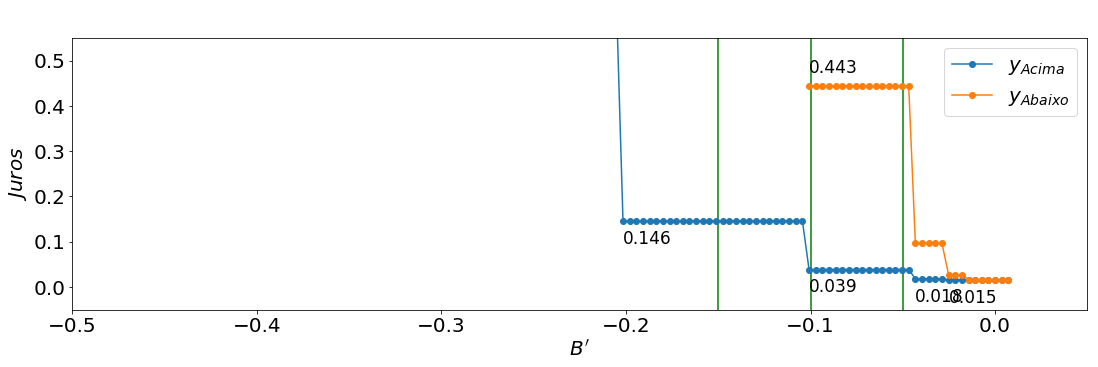

In [32]:
python.arellano_graficos.graficoJuros(Economia_Arellano,'Juros')

# Função Valor Otimo Default

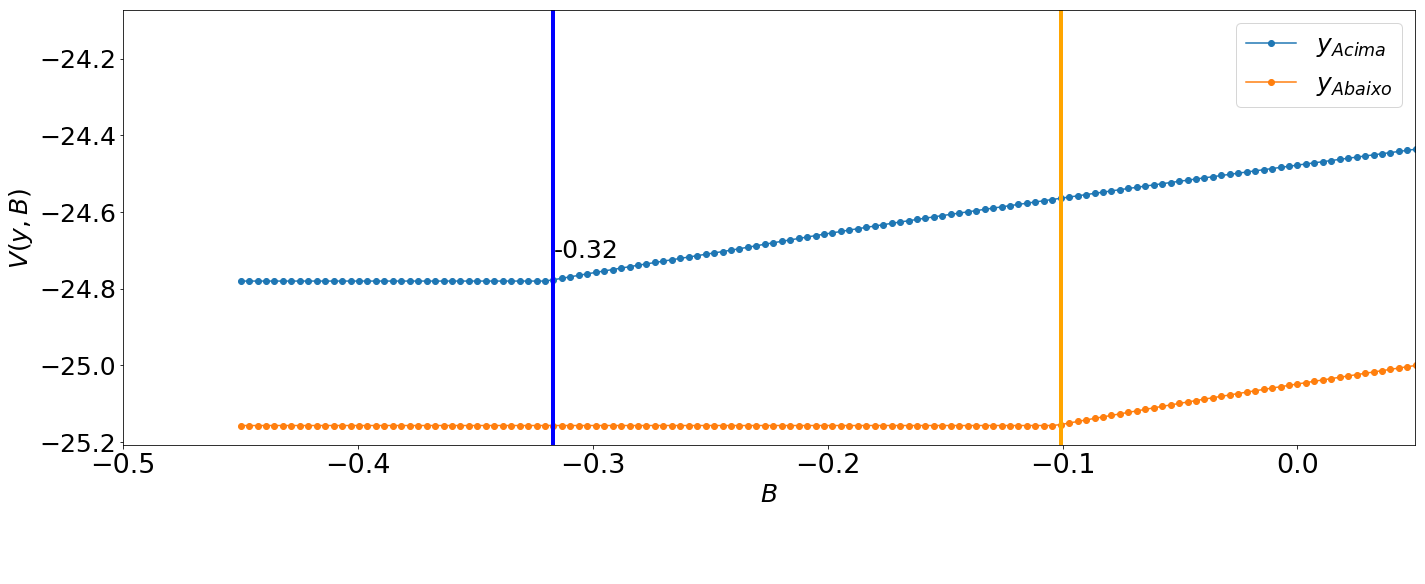

In [33]:
python.arellano_graficos.graficoFuncaoValor(Economia_Arellano,'Funcao Valor')

## Simulação do Ciclo

# Valores Simulados (Parametros para o erro quadratico Medio)

In [34]:
from python.arellano_graficos import simulacao

importlib.reload(python.arellano_graficos)

<module 'python.arellano_graficos' from '../python/arellano_graficos.py'>

In [35]:
dados_1 = simulacao(Economia_Arellano)['simulacao_1']
pd.DataFrame(simulacao(Economia_Arellano)['simulacao_1'])

,dados simulados,média(x),desvio padrão(x),"corr(x,y)","corr(x,r-spread)"
0,Spread Taxa de Juros,2.596244,1.427661,-0.429137,
1,Balança Comercial,0.615962,5.392217,-0.298872,-0.334993
2,Consumo,0.990704,0.083878,0.986679,-0.427095
3,Produto,0.995473,0.084738,,-0.429137


In [36]:
dados_1['corr(x,r-spread)']

['', -0.089997, -0.347783, -0.396068]

In [37]:
pd.DataFrame(simulacao(Economia_Arellano)['simulacao_2'])

,variavel,valor
0,mean dívida externa,-0.009389
1,mean trade balance,0.615684
2,mean default Probability,0.020000


In [38]:
!pip install scipy

You should consider upgrading via the '/home/frederico/miniconda3/bin/python -m pip install --upgrade pip' command.


In [39]:
from scipy.optimize import minimize

In [40]:
def funcao_otimizar(x,*args):
    print(x)
    Economia_Arellano = Arellano_Economy(β = x[0],        # time discount rate
                                     γ = 2.5,          # risk aversion
                                     r = taxa_media_juros_americano,     # international interest rate
                                     ρ = coef_regressao_ar1 ,  # persistence in output
                                     η = std_regressao_ar1,   # st dev of output shock
                                     θ = 0.289,       # prob of regaining access
                                     ny = 21,         # number of points in y grid
                                     nB = 251,        # number of points in B grid
                                     tol = 1e-8,      # error tolerance in iteration
                                     maxit = 10000)
    estatisticas_simuladas_1 = simulacao(Economia_Arellano)['simulacao_1']
    corrSimuSpreadPIB = round(estatisticas_simuladas_1['corr(x,y)'][0],4)
    corrSimuPibBC = round(estatisticas_simuladas_1['corr(x,y)'][1],4)
    corrSimuSpreadBC = round(estatisticas_simuladas_1['corr(x,r-spread)'][1],4)
    valorObjetivo = (corrRealPibBC - corrSimuPibBC)**2 + (corrRealSpreadBC - corrSimuSpreadBC)**2 + (corrRealSpreadPIB - corrSimuSpreadPIB)**2
    return valorObjetivo

In [41]:
import numpy as np
espaco = np.arange(0.7, 0.999999999, 0.01)




In [42]:
resultado_funcao = []
for parametro in espaco:
    resultado_funcao.append(funcao_otimizar([parametro]))

[0.7]
Running iteration 25 with dist of 0.00593777165851872
Running iteration 50 with dist of 1.5458654267774818e-07
[0.71]
Running iteration 25 with dist of 0.00603110047579225
Running iteration 50 with dist of 2.1107194125846718e-07
[0.72]
Running iteration 25 with dist of 0.006282784380879924
Running iteration 50 with dist of 3.3499412355197933e-07
[0.73]
Running iteration 25 with dist of 0.004432540476424052
Running iteration 50 with dist of 5.166540866241576e-07
[0.74]
Running iteration 25 with dist of 0.004761546431270247
Running iteration 50 with dist of 8.567618747790107e-07
[0.75]
Running iteration 25 with dist of 0.005271731709279415
Running iteration 50 with dist of 1.4290060312838193e-06
[0.76]
Running iteration 25 with dist of 0.005777548508413055
Running iteration 50 with dist of 2.436439095809817e-06
[0.77]
Running iteration 25 with dist of 0.006269260333255033
Running iteration 50 with dist of 4.067138153374117e-06
[0.78]
Running iteration 25 with dist of 0.006853714936

Running iteration 100 with dist of 0.033712394338156315
Running iteration 125 with dist of 0.015742803794726257
Running iteration 150 with dist of 0.0073514906524323465
Running iteration 175 with dist of 0.003432960172432331
Running iteration 200 with dist of 0.0016031055645555625
Running iteration 225 with dist of 0.0007486097485092102
Running iteration 250 with dist of 0.00034958181667121835
Running iteration 275 with dist of 0.00016324586581362155
Running iteration 300 with dist of 7.623169008041941e-05
Running iteration 325 with dist of 3.559827101540236e-05
Running iteration 350 with dist of 1.6623492125944495e-05
Running iteration 375 with dist of 7.762750342976688e-06
Running iteration 400 with dist of 3.625008062613233e-06
Running iteration 425 with dist of 1.6927870838401304e-06
Running iteration 450 with dist of 7.904887553422668e-07
Running iteration 475 with dist of 3.69138266620439e-07
Running iteration 500 with dist of 1.723782396823026e-07
Running iteration 525 with dist

No handles with labels found to put in legend.


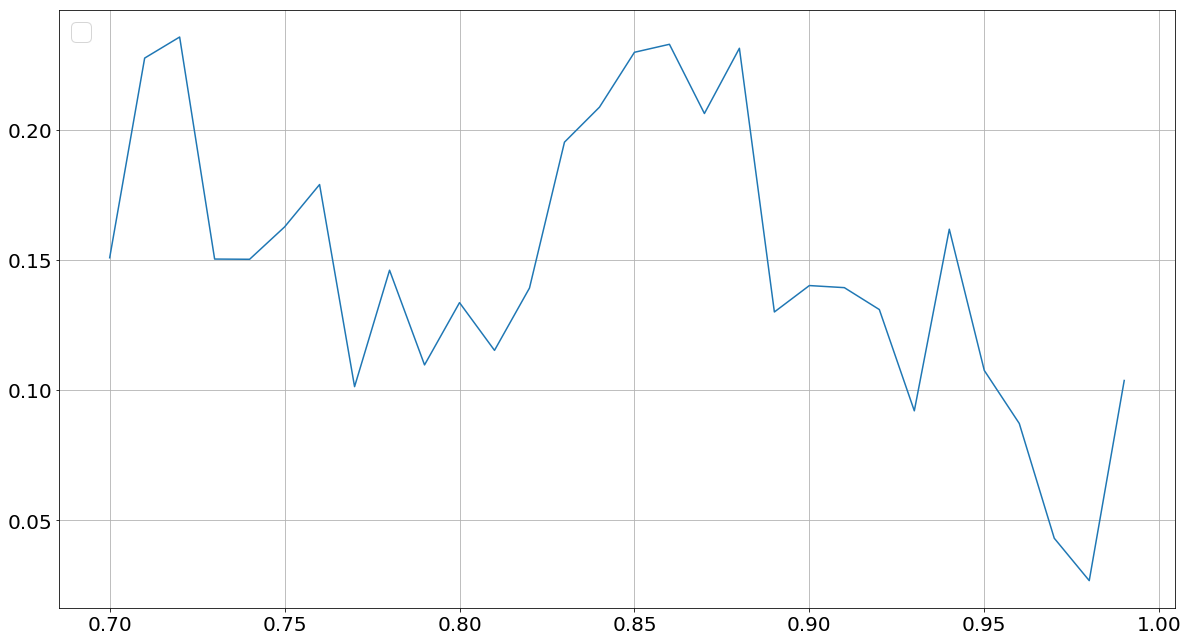

In [43]:
fmt = '{x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro BK
ax.yaxis.set_major_formatter(tick) 
ax.plot(espaco,resultado_funcao)

# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",
          fontsize=25)

# Teste Coeficiente de risco

In [44]:
def funcao_otimizar(x,*args):
    print(x)
    Economia_Arellano = Arellano_Economy(β = 0.98,        # time discount rate
                                     γ = x[0],          # risk aversion
                                     r = taxa_media_juros_americano,     # international interest rate
                                     ρ = coef_regressao_ar1 ,  # persistence in output
                                     η = std_regressao_ar1,   # st dev of output shock
                                     θ = 0.289,       # prob of regaining access
                                     ny = 21,         # number of points in y grid
                                     nB = 251,        # number of points in B grid
                                     tol = 1e-8,      # error tolerance in iteration
                                     maxit = 10000)
    estatisticas_simuladas_1 = simulacao(Economia_Arellano)['simulacao_1']
    corrSimuSpreadPIB = round(estatisticas_simuladas_1['corr(x,y)'][0],4)
    corrSimuPibBC = round(estatisticas_simuladas_1['corr(x,y)'][1],4)
    corrSimuSpreadBC = round(estatisticas_simuladas_1['corr(x,r-spread)'][1],4)
    valorObjetivo = (corrRealPibBC - corrSimuPibBC)**2 + (corrRealSpreadBC - corrSimuSpreadBC)**2 + (corrRealSpreadPIB - corrSimuSpreadPIB)**2
    return valorObjetivo

In [48]:
import numpy as np
espaco_coef_risco = np.arange(2.5, 4.5, 0.1)

In [49]:
resultado_funcao = []
for parametro in espaco_coef_risco:
    resultado_funcao.append(funcao_otimizar([parametro]))

[2.5]
Running iteration 25 with dist of 0.4376564829848917
Running iteration 50 with dist of 0.2535560098952949
Running iteration 75 with dist of 0.15274976623403802
Running iteration 100 with dist of 0.09217303614342853
Running iteration 125 with dist of 0.05562304491587611
Running iteration 150 with dist of 0.03356654299229689
Running iteration 175 with dist of 0.02025622473844635
Running iteration 200 with dist of 0.012223917186936717
Running iteration 225 with dist of 0.007376702882055497
Running iteration 250 with dist of 0.004451580011384237
Running iteration 275 with dist of 0.002686371528668019
Running iteration 300 with dist of 0.0016211304686493122
Running iteration 325 with dist of 0.000978295060214407
Running iteration 350 with dist of 0.000590366564168221
Running iteration 375 with dist of 0.00035626539914090927
Running iteration 400 with dist of 0.00021499360283172564
Running iteration 425 with dist of 0.00012974105644758538
Running iteration 450 with dist of 7.8294151592

Running iteration 125 with dist of 0.04429997398328567
Running iteration 150 with dist of 0.026733468654835946
Running iteration 175 with dist of 0.016132705371379785
Running iteration 200 with dist of 0.00973551868615985
Running iteration 225 with dist of 0.005875042153181909
Running iteration 250 with dist of 0.0035453807254199887
Running iteration 275 with dist of 0.0021395122214329376
Running iteration 300 with dist of 0.0012911201645771087
Running iteration 325 with dist of 0.0007791454812320353
Running iteration 350 with dist of 0.0004701868172993784
Running iteration 375 with dist of 0.0002837411606577689
Running iteration 400 with dist of 0.00017122778285028062
Running iteration 425 with dist of 0.00010332992771822092
Running iteration 450 with dist of 6.235596691439582e-05
Running iteration 475 with dist of 3.76296267319276e-05
Running iteration 500 with dist of 2.2708152535244608e-05
Running iteration 525 with dist of 1.3703569138101557e-05
Running iteration 550 with dist of 

Running iteration 225 with dist of 0.004902091506117756
Running iteration 250 with dist of 0.0029582393261016193
Running iteration 275 with dist of 0.0017851930955536943
Running iteration 300 with dist of 0.0010773010690172669
Running iteration 325 with dist of 0.0006501131985139352
Running iteration 350 with dist of 0.000392320385675049
Running iteration 375 with dist of 0.00023675151553348428
Running iteration 400 with dist of 0.0001428711893538548
Running iteration 425 with dist of 8.621772368400116e-05
Running iteration 450 with dist of 5.2029355330773797e-05
Running iteration 475 with dist of 3.139788086059525e-05
Running iteration 500 with dist of 1.894751370201675e-05
Running iteration 525 with dist of 1.143415624227373e-05
Running iteration 550 with dist of 6.900110012253435e-06
Running iteration 575 with dist of 4.16397303837357e-06
Running iteration 600 with dist of 2.5128108660510406e-06
Running iteration 625 with dist of 1.5163927393757604e-06
Running iteration 650 with dis

Running iteration 425 with dist of 7.427781026336788e-05
Running iteration 450 with dist of 4.482403870653684e-05
Running iteration 475 with dist of 2.704972641254244e-05
Running iteration 500 with dist of 1.6323555847463922e-05
Running iteration 525 with dist of 9.850690226187453e-06
Running iteration 550 with dist of 5.944544124503182e-06
Running iteration 575 with dist of 3.5873227233196303e-06
Running iteration 600 with dist of 2.164822742400929e-06
Running iteration 625 with dist of 1.3063941786128908e-06
Running iteration 650 with dist of 7.883628185823e-07
Running iteration 675 with dist of 4.757491609552744e-07
Running iteration 700 with dist of 2.8709784416491857e-07
Running iteration 725 with dist of 1.732534329335067e-07
Running iteration 750 with dist of 1.0455234189521434e-07
Running iteration 775 with dist of 6.309365829793023e-08
Running iteration 800 with dist of 3.8074801977927564e-08
Running iteration 825 with dist of 2.2976809788133323e-08
Running iteration 850 with 

Running iteration 625 with dist of 1.152242816715443e-06
Running iteration 650 with dist of 6.953379028118434e-07
Running iteration 675 with dist of 4.196119078869742e-07
Running iteration 700 with dist of 2.532209926187079e-07
Running iteration 725 with dist of 1.5280994603017461e-07
Running iteration 750 with dist of 9.221541574788716e-08
Running iteration 775 with dist of 5.564875849017881e-08
Running iteration 800 with dist of 3.358206868142588e-08
Running iteration 825 with dist of 2.0265598976720867e-08
Running iteration 850 with dist of 1.2229580903522219e-08
[4.200000000000001]
Running iteration 25 with dist of 0.2336326926354637
Running iteration 50 with dist of 0.124905710902258
Running iteration 75 with dist of 0.07498109411990583
Running iteration 100 with dist of 0.0452389672440745
Running iteration 125 with dist of 0.02729991174336277
Running iteration 150 with dist of 0.01647452939498706
Running iteration 175 with dist of 0.009941797335756064
Running iteration 200 with d

No handles with labels found to put in legend.


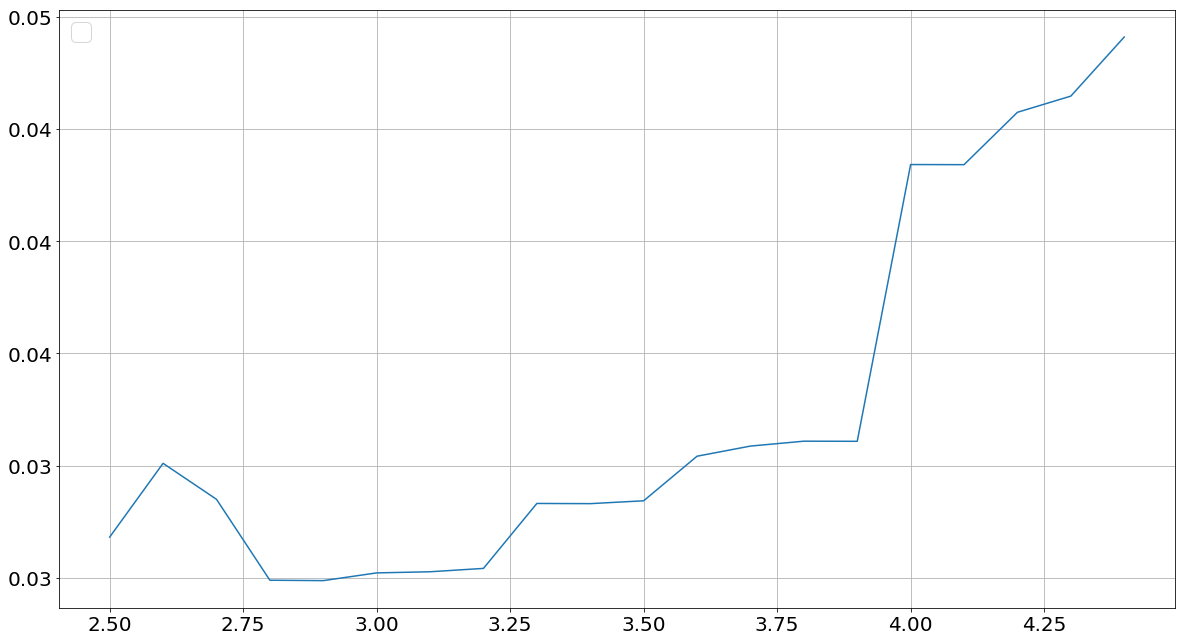

In [50]:
fmt = '{x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro BK
ax.yaxis.set_major_formatter(tick) 
ax.plot(espaco_coef_risco, resultado_funcao)

# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",
          fontsize=25)

# Teste Prob de Reentrada

In [51]:
def funcao_otimizar(x,*args):
    print(x)
    Economia_Arellano = Arellano_Economy(β = 0.98,        # time discount rate
                                     γ = 2.75,          # risk aversion
                                     r = taxa_media_juros_americano,     # international interest rate
                                     ρ = coef_regressao_ar1 ,  # persistence in output
                                     η = std_regressao_ar1,   # st dev of output shock
                                     θ = x[0],       # prob of regaining access
                                     ny = 21,         # number of points in y grid
                                     nB = 251,        # number of points in B grid
                                     tol = 1e-8,      # error tolerance in iteration
                                     maxit = 10000)
    estatisticas_simuladas_1 = simulacao(Economia_Arellano)['simulacao_1']
    corrSimuSpreadPIB = round(estatisticas_simuladas_1['corr(x,y)'][0],4)
    corrSimuPibBC = round(estatisticas_simuladas_1['corr(x,y)'][1],4)
    corrSimuSpreadBC = round(estatisticas_simuladas_1['corr(x,r-spread)'][1],4)
    valorObjetivo = (corrRealPibBC - corrSimuPibBC)**2 + (corrRealSpreadBC - corrSimuSpreadBC)**2 + (corrRealSpreadPIB - corrSimuSpreadPIB)**2
    return valorObjetivo

In [52]:
import numpy as np
espaco_prob_reentrada = np.arange(0, 1, 0.01)

In [53]:
resultado_funcao = []
for parametro in espaco_prob_reentrada:
    resultado_funcao.append(funcao_otimizar([parametro]))

[0.0]
Running iteration 25 with dist of 0.3948691141467737
Running iteration 50 with dist of 0.21707560614372312
Running iteration 75 with dist of 0.1308080204272457
Running iteration 100 with dist of 0.07893250977714672
Running iteration 125 with dist of 0.04763281118924212
Running iteration 150 with dist of 0.02874471535375278
Running iteration 175 with dist of 0.01734642164630884
Running iteration 200 with dist of 0.01046795364186437
Running iteration 225 with dist of 0.006317040815439157
Running iteration 250 with dist of 0.0038121113286919694
Running iteration 275 with dist of 0.0023004747328627673
Running iteration 300 with dist of 0.0013882553630537586
Running iteration 325 with dist of 0.0008377631475369185
Running iteration 350 with dist of 0.0005055605114563377
Running iteration 375 with dist of 0.0003050879374484339
Running iteration 400 with dist of 0.00018410980974437052
Running iteration 425 with dist of 0.00011110377660372706
Running iteration 450 with dist of 6.70472105

Running iteration 150 with dist of 0.02876869797200854
Running iteration 175 with dist of 0.017357909373011182
Running iteration 200 with dist of 0.010474200324217975
Running iteration 225 with dist of 0.006320659886661417
Running iteration 250 with dist of 0.0038142624359451816
Running iteration 275 with dist of 0.002301765710882364
Running iteration 300 with dist of 0.0013890328741794633
Running iteration 325 with dist of 0.000838232012249307
Running iteration 350 with dist of 0.0005058433819371544
Running iteration 375 with dist of 0.00030525862399599646
Running iteration 400 with dist of 0.0001842128096249951
Running iteration 425 with dist of 0.0001111659326369363
Running iteration 450 with dist of 6.708471934047111e-05
Running iteration 475 with dist of 4.0483262004897824e-05
Running iteration 500 with dist of 2.4430220769033895e-05
Running iteration 525 with dist of 1.4742776585308093e-05
Running iteration 550 with dist of 8.896745704589648e-06
Running iteration 575 with dist of

Running iteration 275 with dist of 0.0023138723232420944
Running iteration 300 with dist of 0.0013963403362886595
Running iteration 325 with dist of 0.0008426421437306431
Running iteration 350 with dist of 0.0005085048135882175
Running iteration 375 with dist of 0.00030686471992424913
Running iteration 400 with dist of 0.00018518203529538368
Running iteration 425 with dist of 0.00011175082690328964
Running iteration 450 with dist of 6.743768256711746e-05
Running iteration 475 with dist of 4.06962629000418e-05
Running iteration 500 with dist of 2.4558759299964095e-05
Running iteration 525 with dist of 1.482034506494756e-05
Running iteration 550 with dist of 8.943555535267933e-06
Running iteration 575 with dist of 5.397120332872873e-06
Running iteration 600 with dist of 3.256971780274398e-06
Running iteration 625 with dist of 1.96546760378169e-06
Running iteration 650 with dist of 1.186090386795513e-06
Running iteration 675 with dist of 7.157637185173371e-07
Running iteration 700 with di

Running iteration 400 with dist of 0.00018533065144765715
Running iteration 425 with dist of 0.00011184051150792129
Running iteration 450 with dist of 6.74918040601824e-05
Running iteration 475 with dist of 4.072892332374067e-05
Running iteration 500 with dist of 2.4578468710956258e-05
Running iteration 525 with dist of 1.483223899612085e-05
Running iteration 550 with dist of 8.950733104029496e-06
Running iteration 575 with dist of 5.401451744546648e-06
Running iteration 600 with dist of 3.259585618309302e-06
Running iteration 625 with dist of 1.967044966022513e-06
Running iteration 650 with dist of 1.187042265371474e-06
Running iteration 675 with dist of 7.16338149686635e-07
Running iteration 700 with dist of 4.322848283777603e-07
Running iteration 725 with dist of 2.608686529015358e-07
Running iteration 750 with dist of 1.5742504189120154e-07
Running iteration 775 with dist of 9.500046616039981e-08
Running iteration 800 with dist of 5.732943719749528e-08
Running iteration 825 with di

Running iteration 525 with dist of 1.4831895832401187e-05
Running iteration 550 with dist of 8.950526023454586e-06
Running iteration 575 with dist of 5.40132678139571e-06
Running iteration 600 with dist of 3.259510215514183e-06
Running iteration 625 with dist of 1.966999462865715e-06
Running iteration 650 with dist of 1.187014802894737e-06
Running iteration 675 with dist of 7.163215727246097e-07
Running iteration 700 with dist of 4.3227481327789974e-07
Running iteration 725 with dist of 2.6086261328828186e-07
Running iteration 750 with dist of 1.574213968069671e-07
Running iteration 775 with dist of 9.499827768877367e-08
Running iteration 800 with dist of 5.732811558800677e-08
Running iteration 825 with dist of 3.459549802187212e-08
Running iteration 850 with dist of 2.087717376753062e-08
Running iteration 875 with dist of 1.2598647458617052e-08
[0.17]
Running iteration 25 with dist of 0.3874684304404017
Running iteration 50 with dist of 0.21877283321782315
Running iteration 75 with di

Running iteration 650 with dist of 1.1869541154396757e-06
Running iteration 675 with dist of 7.162849549047223e-07
Running iteration 700 with dist of 4.322527118461039e-07
Running iteration 725 with dist of 2.6084927640113165e-07
Running iteration 750 with dist of 1.574133534631983e-07
Running iteration 775 with dist of 9.499341047103371e-08
Running iteration 800 with dist of 5.732518104650808e-08
Running iteration 825 with dist of 3.4593732323173754e-08
Running iteration 850 with dist of 2.087610795342698e-08
Running iteration 875 with dist of 1.2598007970154868e-08
[0.21]
Running iteration 25 with dist of 0.38551649810216126
Running iteration 50 with dist of 0.21870052810862006
Running iteration 75 with dist of 0.13166213870539423
Running iteration 100 with dist of 0.07944584501518648
Running iteration 125 with dist of 0.047942596307013474
Running iteration 150 with dist of 0.028931662303129713
Running iteration 175 with dist of 0.01745923769755464
Running iteration 200 with dist of 

Running iteration 775 with dist of 9.498202757640684e-08
Running iteration 800 with dist of 5.7318317203680635e-08
Running iteration 825 with dist of 3.4589582753596915e-08
Running iteration 850 with dist of 2.0873606842997106e-08
Running iteration 875 with dist of 1.2596501619555056e-08
[0.25]
Running iteration 25 with dist of 0.38229773287478785
Running iteration 50 with dist of 0.21863849101469768
Running iteration 75 with dist of 0.13164648244261556
Running iteration 100 with dist of 0.07943706456540411
Running iteration 125 with dist of 0.04793731437275639
Running iteration 150 with dist of 0.028928475225736605
Running iteration 175 with dist of 0.017457314417132608
Running iteration 200 with dist of 0.010534873525998023
Running iteration 225 with dist of 0.006357424605603512
Running iteration 250 with dist of 0.0038364815217164505
Running iteration 275 with dist of 0.0023151812848212217
Running iteration 300 with dist of 0.001397130248435019
Running iteration 325 with dist of 0.0

Running iteration 875 with dist of 1.2594764342566123e-08
[0.29]
Running iteration 25 with dist of 0.38077719833791157
Running iteration 50 with dist of 0.21859344378907863
Running iteration 75 with dist of 0.13163146702387962
Running iteration 100 with dist of 0.07942837865860852
Running iteration 125 with dist of 0.047932081855158515
Running iteration 150 with dist of 0.028925317789532556
Running iteration 175 with dist of 0.01745540902013687
Running iteration 200 with dist of 0.010533723686201313
Running iteration 225 with dist of 0.006356730717861581
Running iteration 250 with dist of 0.003836062784934313
Running iteration 275 with dist of 0.002314928591928833
Running iteration 300 with dist of 0.0013969777571958275
Running iteration 325 with dist of 0.0008430268047590062
Running iteration 350 with dist of 0.0005087369429404021
Running iteration 375 with dist of 0.0003070048018116722
Running iteration 400 with dist of 0.00018526656977968514
Running iteration 425 with dist of 0.0001

Running iteration 125 with dist of 0.047926792403881535
Running iteration 150 with dist of 0.02892212595681798
Running iteration 175 with dist of 0.017453482865196435
Running iteration 200 with dist of 0.010532561319710254
Running iteration 225 with dist of 0.006356029270662589
Running iteration 250 with dist of 0.0038356394862901766
Running iteration 275 with dist of 0.0023146731461451964
Running iteration 300 with dist of 0.0013968236046721927
Running iteration 325 with dist of 0.0008429337791540092
Running iteration 350 with dist of 0.0005086808052681135
Running iteration 375 with dist of 0.0003069709246972252
Running iteration 400 with dist of 0.0001852461261364624
Running iteration 425 with dist of 0.00011178950345680505
Running iteration 450 with dist of 6.746102250332342e-05
Running iteration 475 with dist of 4.071034773289739e-05
Running iteration 500 with dist of 2.4567258996910368e-05
Running iteration 525 with dist of 1.482547431663761e-05
Running iteration 550 with dist of 

Running iteration 225 with dist of 0.0063550724620498045
Running iteration 250 with dist of 0.003835062086047003
Running iteration 275 with dist of 0.0023143247054449034
Running iteration 300 with dist of 0.001396613333007224
Running iteration 325 with dist of 0.0008428068876256134
Running iteration 350 with dist of 0.0005086042307027583
Running iteration 375 with dist of 0.0003069247146640919
Running iteration 400 with dist of 0.00018521823999861908
Running iteration 425 with dist of 0.00011177267516160327
Running iteration 450 with dist of 6.745086722048654e-05
Running iteration 475 with dist of 4.070421937285573e-05
Running iteration 500 with dist of 2.456356074986843e-05
Running iteration 525 with dist of 1.4823242558748007e-05
Running iteration 550 with dist of 8.945304074359228e-06
Running iteration 575 with dist of 5.398175510151759e-06
Running iteration 600 with dist of 3.257608540252477e-06
Running iteration 625 with dist of 1.965851865293189e-06
Running iteration 650 with dis

Running iteration 325 with dist of 0.0008427297107616027
Running iteration 350 with dist of 0.0005085576571914885
Running iteration 375 with dist of 0.000306896609181706
Running iteration 400 with dist of 0.0001852012793435165
Running iteration 425 with dist of 0.00011176243999955204
Running iteration 450 with dist of 6.744469066433112e-05
Running iteration 475 with dist of 4.070049203619419e-05
Running iteration 500 with dist of 2.4561311441573253e-05
Running iteration 525 with dist of 1.4821885187643602e-05
Running iteration 550 with dist of 8.944484953588017e-06
Running iteration 575 with dist of 5.397681199781346e-06
Running iteration 600 with dist of 3.25731024020115e-06
Running iteration 625 with dist of 1.9656718563965114e-06
Running iteration 650 with dist of 1.1862136410911717e-06
Running iteration 675 with dist of 7.158381123417712e-07
Running iteration 700 with dist of 4.3198306087788296e-07
Running iteration 725 with dist of 2.6068654790378787e-07
Running iteration 750 with

Running iteration 450 with dist of 6.743746868664857e-05
Running iteration 475 with dist of 4.069613382995385e-05
Running iteration 500 with dist of 2.45586814102694e-05
Running iteration 525 with dist of 1.4820298048334735e-05
Running iteration 550 with dist of 8.943527177507349e-06
Running iteration 575 with dist of 5.397103215898369e-06
Running iteration 600 with dist of 3.2569614347721654e-06
Running iteration 625 with dist of 1.96546136521647e-06
Running iteration 650 with dist of 1.1860866209190135e-06
Running iteration 675 with dist of 7.1576145188601e-07
Running iteration 700 with dist of 4.319367974403576e-07
Running iteration 725 with dist of 2.606586377851272e-07
Running iteration 750 with dist of 1.5729830948885137e-07
Running iteration 775 with dist of 9.492399044574995e-08
Running iteration 800 with dist of 5.728329455223502e-08
Running iteration 825 with dist of 3.456845121263541e-08
Running iteration 850 with dist of 2.0860845495462854e-08
Running iteration 875 with dis

Running iteration 550 with dist of 8.942671144041014e-06
Running iteration 575 with dist of 5.396586644224044e-06
Running iteration 600 with dist of 3.2566497054631327e-06
Running iteration 625 with dist of 1.96527324192175e-06
Running iteration 650 with dist of 1.1859730975061211e-06
Running iteration 675 with dist of 7.15692941355428e-07
Running iteration 700 with dist of 4.318954580639911e-07
Running iteration 725 with dist of 2.606336906296747e-07
Running iteration 750 with dist of 1.5728324598285326e-07
Running iteration 775 with dist of 9.491490260415958e-08
Running iteration 800 with dist of 5.7277802056887595e-08
Running iteration 825 with dist of 3.456514008348677e-08
Running iteration 850 with dist of 2.0858855975802726e-08
Running iteration 875 with dist of 1.2587598519075982e-08
[0.5]
Running iteration 25 with dist of 0.3780683912982088
Running iteration 50 with dist of 0.2184008197453089
Running iteration 75 with dist of 0.13155230787738148
Running iteration 100 with dist 

Running iteration 650 with dist of 1.185859083818741e-06
Running iteration 675 with dist of 7.156241466077518e-07
Running iteration 700 with dist of 4.3185394105194064e-07
Running iteration 725 with dist of 2.606086297873844e-07
Running iteration 750 with dist of 1.5726813273886364e-07
Running iteration 775 with dist of 9.490577923543242e-08
Running iteration 800 with dist of 5.7272295350685454e-08
Running iteration 825 with dist of 3.456181829619709e-08
Running iteration 850 with dist of 2.0856852245287882e-08
Running iteration 875 with dist of 1.2586383490997832e-08
[0.54]
Running iteration 25 with dist of 0.3778720276585119
Running iteration 50 with dist of 0.21837795005855654
Running iteration 75 with dist of 0.1315416084011538
Running iteration 100 with dist of 0.07937527588831372
Running iteration 125 with dist of 0.04790006266249236
Running iteration 150 with dist of 0.028905995917039462
Running iteration 175 with dist of 0.017443748963938077
Running iteration 200 with dist of 0

Running iteration 750 with dist of 1.5725405688726823e-07
Running iteration 775 with dist of 9.489728824974009e-08
Running iteration 800 with dist of 5.7267172337560623e-08
Running iteration 825 with dist of 3.4558723882582854e-08
Running iteration 850 with dist of 2.0854983517892833e-08
Running iteration 875 with dist of 1.2585253728047974e-08
[0.58]
Running iteration 25 with dist of 0.37767471852759016
Running iteration 50 with dist of 0.2183522067280137
Running iteration 75 with dist of 0.13152933118578858
Running iteration 100 with dist of 0.07936795437489863
Running iteration 125 with dist of 0.04789564638053534
Running iteration 150 with dist of 0.02890333088961583
Running iteration 175 with dist of 0.017442140714791776
Running iteration 200 with dist of 0.010525716732178836
Running iteration 225 with dist of 0.006351898803501399
Running iteration 250 with dist of 0.003833146895043882
Running iteration 275 with dist of 0.002313168955232925
Running iteration 300 with dist of 0.001

Running iteration 875 with dist of 1.258428738992734e-08
[0.62]
Running iteration 25 with dist of 0.3775304279956089
Running iteration 50 with dist of 0.21833050256906716
Running iteration 75 with dist of 0.13151864781174538
Running iteration 100 with dist of 0.07936157141431721
Running iteration 125 with dist of 0.047891795945325555
Running iteration 150 with dist of 0.028901007319127814
Running iteration 175 with dist of 0.017440738522608967
Running iteration 200 with dist of 0.010524870558668908
Running iteration 225 with dist of 0.006351388167644245
Running iteration 250 with dist of 0.003832838744308731
Running iteration 275 with dist of 0.002312982997132451
Running iteration 300 with dist of 0.0013958036593564316
Running iteration 325 with dist of 0.0008423182781243099
Running iteration 350 with dist of 0.0005083093721083287
Running iteration 375 with dist of 0.000306746777894773
Running iteration 400 with dist of 0.00018511086144457067
Running iteration 425 with dist of 0.000111

Running iteration 125 with dist of 0.04788758984307151
Running iteration 150 with dist of 0.028898469120228754
Running iteration 175 with dist of 0.017439206809847008
Running iteration 200 with dist of 0.010523946224058278
Running iteration 225 with dist of 0.006350830364297622
Running iteration 250 with dist of 0.0038325021296756745
Running iteration 275 with dist of 0.0023127798620663498
Running iteration 300 with dist of 0.0013956810745199277
Running iteration 325 with dist of 0.0008422443024969084
Running iteration 350 with dist of 0.0005082647304277543
Running iteration 375 with dist of 0.00030671983821406457
Running iteration 400 with dist of 0.00018509460429072533
Running iteration 425 with dist of 0.00011169806536770466
Running iteration 450 with dist of 6.74058428487001e-05
Running iteration 475 with dist of 4.067704874444189e-05
Running iteration 500 with dist of 2.4547164244381747e-05
Running iteration 525 with dist of 1.481334783903776e-05
Running iteration 550 with dist of

Running iteration 225 with dist of 0.006350258682818577
Running iteration 250 with dist of 0.0038321571400672383
Running iteration 275 with dist of 0.002312571673009245
Running iteration 300 with dist of 0.0013955554397568903
Running iteration 325 with dist of 0.0008421684863577639
Running iteration 350 with dist of 0.000508218978069408
Running iteration 375 with dist of 0.00030669222826418263
Running iteration 400 with dist of 0.0001850779426746385
Running iteration 425 with dist of 0.00011168801066929746
Running iteration 450 with dist of 6.739977519032436e-05
Running iteration 475 with dist of 4.0673387140088835e-05
Running iteration 500 with dist of 2.4544954580818512e-05
Running iteration 525 with dist of 1.4812014399012696e-05
Running iteration 550 with dist of 8.938528274882174e-06
Running iteration 575 with dist of 5.394086556975708e-06
Running iteration 600 with dist of 3.2551409958614386e-06
Running iteration 625 with dist of 1.964362787987284e-06
Running iteration 650 with d

Running iteration 350 with dist of 0.0005081831687618887
Running iteration 375 with dist of 0.0003066706186203305
Running iteration 400 with dist of 0.0001850649020056494
Running iteration 425 with dist of 0.00011168014108875468
Running iteration 450 with dist of 6.739502617847393e-05
Running iteration 475 with dist of 4.067052127254556e-05
Running iteration 500 with dist of 2.454322513756324e-05
Running iteration 525 with dist of 1.4810970739631557e-05
Running iteration 550 with dist of 8.937898460459337e-06
Running iteration 575 with dist of 5.393706494771777e-06
Running iteration 600 with dist of 3.2549116397717626e-06
Running iteration 625 with dist of 1.9642243884732125e-06
Running iteration 650 with dist of 1.1853401531425334e-06
Running iteration 675 with dist of 7.153109820023928e-07
Running iteration 700 with dist of 4.316649580005105e-07
Running iteration 725 with dist of 2.604945876782949e-07
Running iteration 750 with dist of 1.571992953586232e-07
Running iteration 775 with

Running iteration 450 with dist of 6.738971656261583e-05
Running iteration 475 with dist of 4.066731710139493e-05
Running iteration 500 with dist of 2.4541291537616416e-05
Running iteration 525 with dist of 1.4809803886350892e-05
Running iteration 550 with dist of 8.937194309055485e-06
Running iteration 575 with dist of 5.393281554688656e-06
Running iteration 600 with dist of 3.254655212003854e-06
Running iteration 625 with dist of 1.964069632265364e-06
Running iteration 650 with dist of 1.1852467629580588e-06
Running iteration 675 with dist of 7.152546217525924e-07
Running iteration 700 with dist of 4.3163095142517705e-07
Running iteration 725 with dist of 2.6047406720408617e-07
Running iteration 750 with dist of 1.5718691770416626e-07
Running iteration 775 with dist of 9.485676599751969e-08
Running iteration 800 with dist of 5.724272256202312e-08
Running iteration 825 with dist of 3.454398012081583e-08
Running iteration 850 with dist of 2.0846073311986402e-08
Running iteration 875 wi

Running iteration 550 with dist of 8.936446263874132e-06
Running iteration 575 with dist of 5.3928301397832e-06
Running iteration 600 with dist of 3.254382797024391e-06
Running iteration 625 with dist of 1.9639052410980185e-06
Running iteration 650 with dist of 1.1851475534285782e-06
Running iteration 675 with dist of 7.151947585271046e-07
Running iteration 700 with dist of 4.3159482032706364e-07
Running iteration 725 with dist of 2.604522606475257e-07
Running iteration 750 with dist of 1.5717376555812734e-07
Running iteration 775 with dist of 9.48488363405886e-08
Running iteration 800 with dist of 5.7237933503984095e-08
Running iteration 825 with dist of 3.454108110645393e-08
Running iteration 850 with dist of 2.0844339587711147e-08
Running iteration 875 with dist of 1.257883752714406e-08
[0.8300000000000001]
Running iteration 25 with dist of 0.376845993044455
Running iteration 50 with dist of 0.21821517174620197
Running iteration 75 with dist of 0.13146036286767426
Running iteration 

Running iteration 650 with dist of 1.185046194507322e-06
Running iteration 675 with dist of 7.151335914556967e-07
Running iteration 700 with dist of 4.315579076319409e-07
Running iteration 725 with dist of 2.604299851327596e-07
Running iteration 750 with dist of 1.5716032208956676e-07
Running iteration 775 with dist of 9.484071483711887e-08
Running iteration 800 with dist of 5.723303786453471e-08
Running iteration 825 with dist of 3.453812524867317e-08
Running iteration 850 with dist of 2.084254902001703e-08
Running iteration 875 with dist of 1.2577750396758347e-08
[0.87]
Running iteration 25 with dist of 0.37673762934364063
Running iteration 50 with dist of 0.21820134597372842
Running iteration 75 with dist of 0.13145147036825477
Running iteration 100 with dist of 0.07932126570461762
Running iteration 125 with dist of 0.04786747728578433
Running iteration 150 with dist of 0.02888633194763557
Running iteration 175 with dist of 0.01743188245507099
Running iteration 200 with dist of 0.01

Running iteration 775 with dist of 9.483020591005697e-08
Running iteration 800 with dist of 5.722668916519069e-08
Running iteration 825 with dist of 3.453429542332742e-08
Running iteration 850 with dist of 2.084023975612581e-08
Running iteration 875 with dist of 1.2576364838423615e-08
[0.91]
Running iteration 25 with dist of 0.3765665018684192
Running iteration 50 with dist of 0.21817465484500786
Running iteration 75 with dist of 0.13143565067159102
Running iteration 100 with dist of 0.0793116977648829
Running iteration 125 with dist of 0.047861702481448276
Running iteration 150 with dist of 0.028882847032193126
Running iteration 175 with dist of 0.017429779430912617
Running iteration 200 with dist of 0.010518257133369957
Running iteration 225 with dist of 0.006347397198730675
Running iteration 250 with dist of 0.0038304303353413616
Running iteration 275 with dist of 0.0023115296072617753
Running iteration 300 with dist of 0.0013949265898283159
Running iteration 325 with dist of 0.0008

Running iteration 875 with dist of 1.2574730590131367e-08
[0.9500000000000001]
Running iteration 25 with dist of 0.37644793115052266
Running iteration 50 with dist of 0.2181402448850207
Running iteration 75 with dist of 0.13141797795882582
Running iteration 100 with dist of 0.07930111536472495
Running iteration 125 with dist of 0.04785531819649336
Running iteration 150 with dist of 0.028878994379169853
Running iteration 175 with dist of 0.017427454491468097
Running iteration 200 with dist of 0.010516854114442253
Running iteration 225 with dist of 0.006346550526288297
Running iteration 250 with dist of 0.003829919398384618
Running iteration 275 with dist of 0.0023112212748301886
Running iteration 300 with dist of 0.0013947405220946507
Running iteration 325 with dist of 0.0008416767122909619
Running iteration 350 with dist of 0.0005079222097492675
Running iteration 375 with dist of 0.0003065131390584952
Running iteration 400 with dist of 0.00018496986864846576
Running iteration 425 with 

Running iteration 100 with dist of 0.07929030687714089
Running iteration 125 with dist of 0.047848795876547
Running iteration 150 with dist of 0.02887505839112947
Running iteration 175 with dist of 0.01742507926151049
Running iteration 200 with dist of 0.010515420746937565
Running iteration 225 with dist of 0.006345685539550061
Running iteration 250 with dist of 0.003829397409404578
Running iteration 275 with dist of 0.0023109062728821073
Running iteration 300 with dist of 0.0013945504295236333
Running iteration 325 with dist of 0.0008415619981221312
Running iteration 350 with dist of 0.0005078529838016266
Running iteration 375 with dist of 0.00030647136365047345
Running iteration 400 with dist of 0.00018494465866325527
Running iteration 425 with dist of 0.00011160757846795377
Running iteration 450 with dist of 6.735123719181502e-05
Running iteration 475 with dist of 4.0644096166886357e-05
Running iteration 500 with dist of 2.4527278519315132e-05
Running iteration 525 with dist of 1.48

No handles with labels found to put in legend.


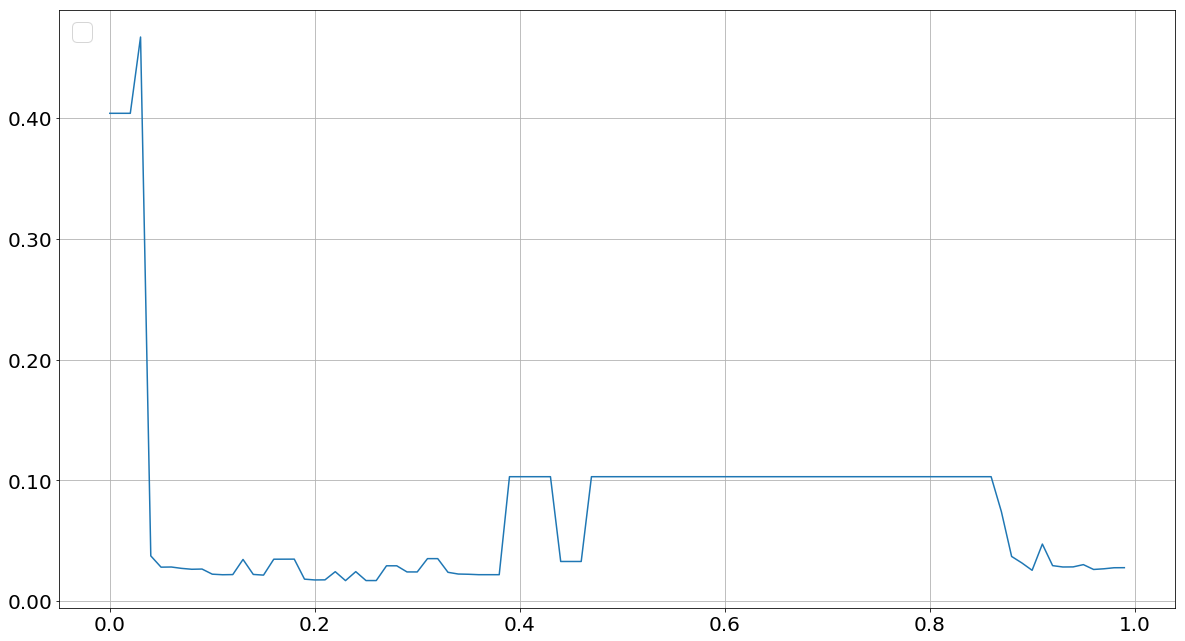

In [54]:
fmt = '{x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot do Compenente ciclico da série do pib real dessazonalizado filtro BK
ax.yaxis.set_major_formatter(tick) 
ax.plot(espaco_prob_reentrada, resultado_funcao)

# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",
          fontsize=25)

# Otimização

In [55]:
def funcao_otimizar(x,*args):
    print(x)
    Economia_Arellano = Arellano_Economy(β = x[0],        # time discount rate
                                     γ = x[1],          # risk aversion
                                     r = taxa_media_juros_americano,     # international interest rate
                                     ρ = coef_regressao_ar1 ,  # persistence in output
                                     η = std_regressao_ar1,   # st dev of output shock
                                     θ = x[2],       # prob of regaining access
                                     ny = 21,         # number of points in y grid
                                     nB = 251,        # number of points in B grid
                                     tol = 1e-8,      # error tolerance in iteration
                                     maxit = 10000)
    estatisticas_simuladas_1 = simulacao(Economia_Arellano)['simulacao_1']
    corrSimuSpreadPIB = round(estatisticas_simuladas_1['corr(x,y)'][0],4)
    corrSimuPibBC = round(estatisticas_simuladas_1['corr(x,y)'][1],4)
    corrSimuSpreadBC = round(estatisticas_simuladas_1['corr(x,r-spread)'][1],4)
    valorObjetivo = (corrRealPibBC - corrSimuPibBC)**2 + (corrRealSpreadBC - corrSimuSpreadBC)**2 + (corrRealSpreadPIB - corrSimuSpreadPIB)**2
    return valorObjetivo

In [60]:
bnds = ((0.7, 0.999), (2, 4.5), (0,1))
res = minimize(funcao_otimizar,[0.98,2.85,0.289],bounds=bnds)

[0.98  2.85  0.289]
Running iteration 25 with dist of 0.36249835212696446
Running iteration 50 with dist of 0.20728328195254164
Running iteration 75 with dist of 0.12479937228465943
Running iteration 100 with dist of 0.07530527186565905
Running iteration 125 with dist of 0.0454439281936061
Running iteration 150 with dist of 0.02742380472170325
Running iteration 175 with dist of 0.016549298840462967
Running iteration 200 with dist of 0.0099869181514336
Running iteration 225 with dist of 0.006026752863558471
Running iteration 250 with dist of 0.003636932788261049
Running iteration 275 with dist of 0.0021947606622987337
Running iteration 300 with dist of 0.001324460650007353
Running iteration 325 with dist of 0.0007992652882684581
Running iteration 350 with dist of 0.0004823284112163151
Running iteration 375 with dist of 0.00029106818434954107
Running iteration 400 with dist of 0.00017564938321967816
Running iteration 425 with dist of 0.00010599820759082945
Running iteration 450 with dist

In [61]:
res

      fun: 0.02487960000000001
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
   status: 0
  success: True
        x: array([0.98 , 2.85 , 0.289])